In [ ]:
##Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/airbnblistings.csv")

In [ ]:
df.head(5)

,id,name,host_id,host_name,host_since_Year,neighbourhood,latitude,longitude,room_type,price,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,...,2022-06-01,4.89,4.93,5.00,4.97,4.98,4.69,4.82,2,1.0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009,Centrum-Oost,52.36407,4.89393,Private room,106,...,2020-04-09,4.44,4.69,4.79,4.63,4.62,4.87,4.49,2,1.0
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010,Centrum-West,52.38761,4.89188,Private room,126,...,2022-04-24,4.94,4.92,4.95,4.95,4.92,4.89,4.79,2,1.0
3,28871,Comfortable double room,124245,Edwin,2010,Centrum-West,52.36775,4.89092,Private room,75,...,2022-06-04,4.88,4.95,4.90,4.96,4.94,4.97,4.83,2,1.0
4,29051,Comfortable single room,124245,Edwin,2010,Centrum-Oost,52.36584,4.89111,Private room,55,...,2022-06-02,4.79,4.88,4.84,4.92,4.91,4.87,4.76,1,1.0


In [ ]:
def make_upper(x):
  return x.upper()

In [ ]:
df['name']=df['name'].apply(make_upper)

In [ ]:
df['name'].str.contains("AMSTERDAM").count()

6173

In [ ]:
df[df['name'].str.contains("AMSTERDAM")]["price"].mean()

200.10332326283987

In [ ]:
df[df['name'].str.contains("AMSTERDAM")]["review_scores_rating"].mean()

4.794828767123287

In [ ]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'price'}>]], dtype=object)

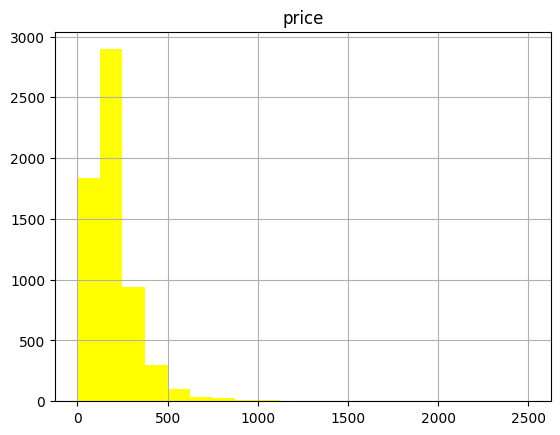

In [ ]:
df.hist(column='price',bins=20,rwidth=2,color = "yellow")

array([[<Axes: title={'center': 'number_of_reviews'}>]], dtype=object)

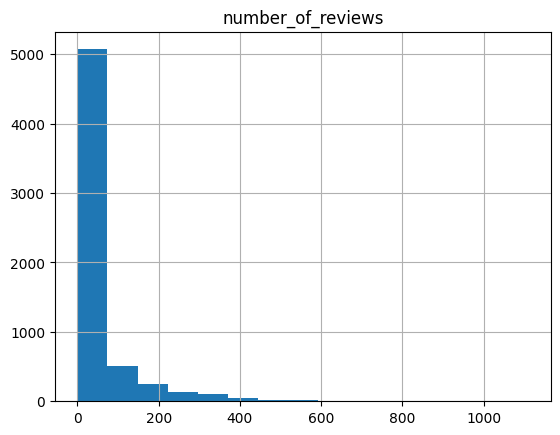

In [ ]:
df.hist(column='number_of_reviews',bins=15,rwidth=2)

array([[<Axes: title={'center': 'review_scores_rating'}>]], dtype=object)

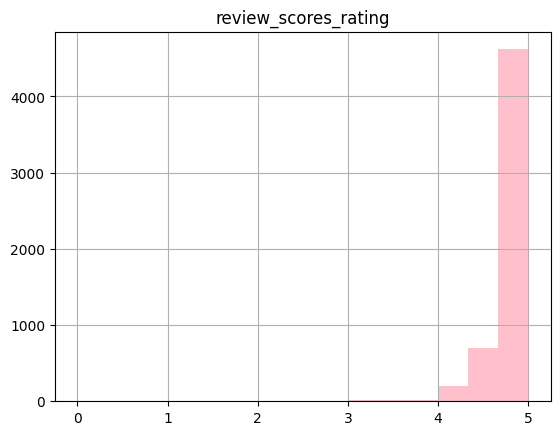

In [ ]:
df.hist(column='review_scores_rating',bins=15,rwidth=2,color="pink")

Text(0.5, 1.0, 'Airbnbs per room type')

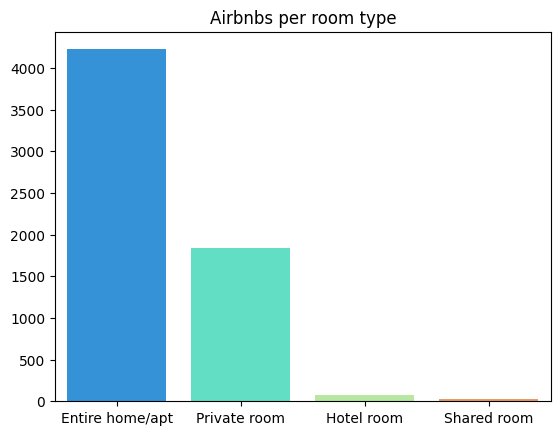

In [ ]:
%matplotlib inline
airbnb_by_rooms = df["room_type"].value_counts()
x=airbnb_by_rooms.index
y=airbnb_by_rooms.values
sns.barplot(x=x, y=y, palette="rainbow")
plt.title("Airbnbs per room type")

In [ ]:
df["room_type"].value_counts().nlargest(1)

Entire home/apt    4223
Name: room_type, dtype: int64

<Axes: xlabel='number_of_reviews', ylabel='review_scores_rating'>

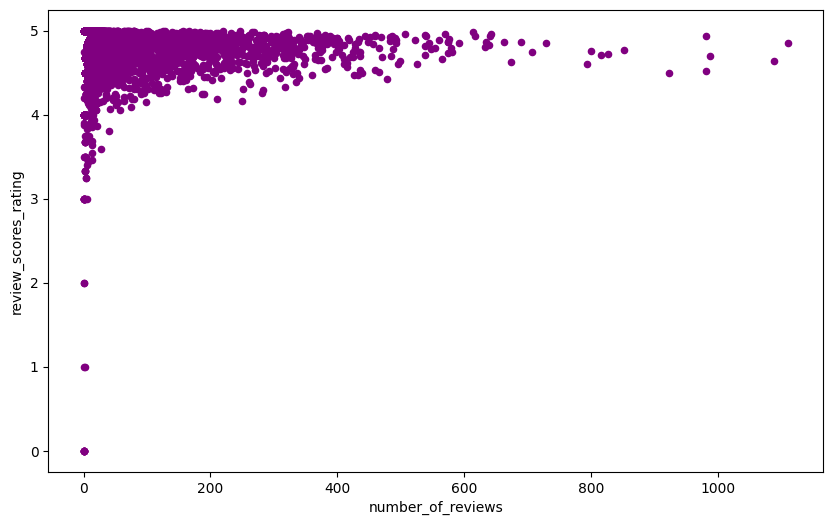

In [ ]:
df.plot(kind='scatter',x='number_of_reviews', y='review_scores_rating', figsize=(10,6),color="purple")

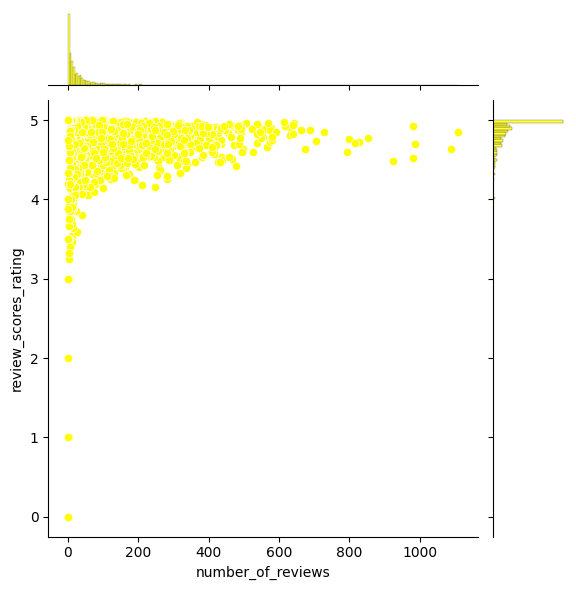

In [ ]:
sns.jointplot(data=df,kind='scatter',x='number_of_reviews', y='review_scores_rating',color="yellow")
plt.show()

In [ ]:
import seaborn as sns

<Axes: xlabel='review_scores_rating', ylabel='host_since_Year'>

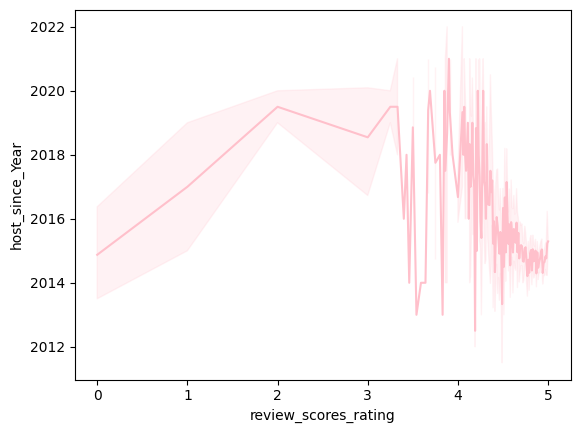

In [ ]:
sns.lineplot(x = "review_scores_rating", y = "host_since_Year",data=df,color="pink")

In [ ]:
df2=df[(df.neighbourhood=='Westerpark') | (df.neighbourhood=='Oud-Noord') | (df.neighbourhood=='Noord-West') | (df.neighbourhood=='Zuid')]

<Axes: xlabel='neighbourhood', ylabel='price'>

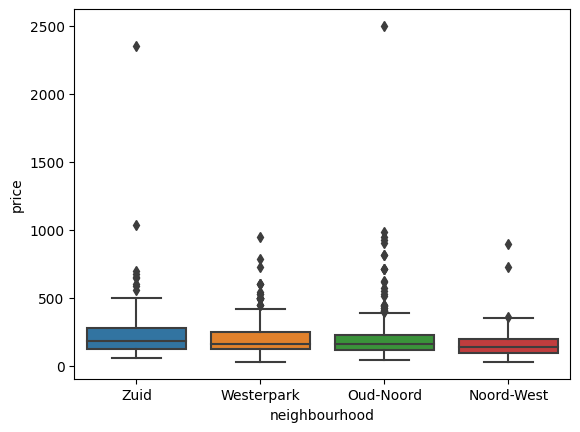

In [ ]:
sns.boxplot(data=df2, y='price', x=df2['neighbourhood'])

In [ ]:
review_columns = ['review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']

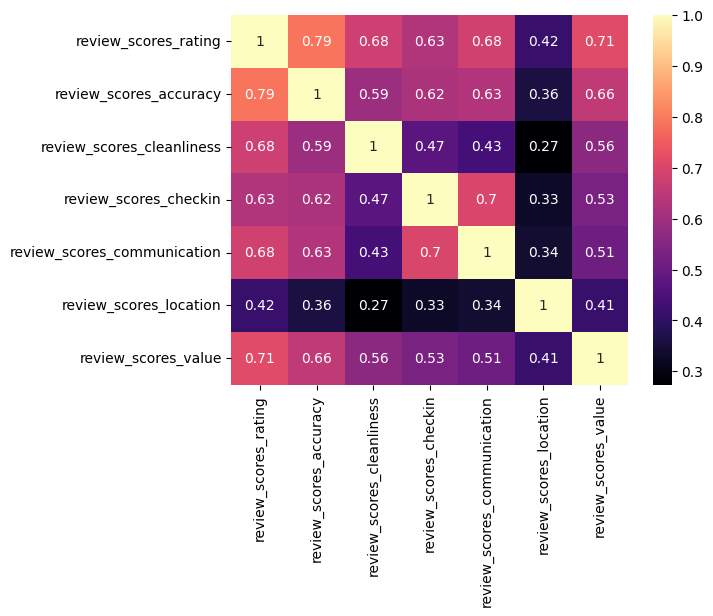

In [35]:
dataplot=sns.heatmap(df.loc[:,review_columns].corr(),cmap="magma",annot=True)
# displaying heatmap
plt.show()